In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

C:\Users\BHUVAN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
yf.pdr_override()

In [3]:
from datetime import datetime

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800,AMAZON
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON
2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000,AMAZON
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58737500,AMAZON


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,160.016251,161.799435,158.437619,160.197619,159.714173,6.946160e+07
std,18.725281,18.486257,19.009338,18.733210,18.906609,2.402319e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,1.938216e+07
25%,145.817505,147.360004,144.072502,145.924995,145.292133,5.139045e+07
50%,154.805000,157.095001,153.415001,155.154999,154.485619,6.487535e+07
75%,177.077499,177.894993,175.867504,176.427505,176.427505,8.103088e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-09-01 to 2023-09-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


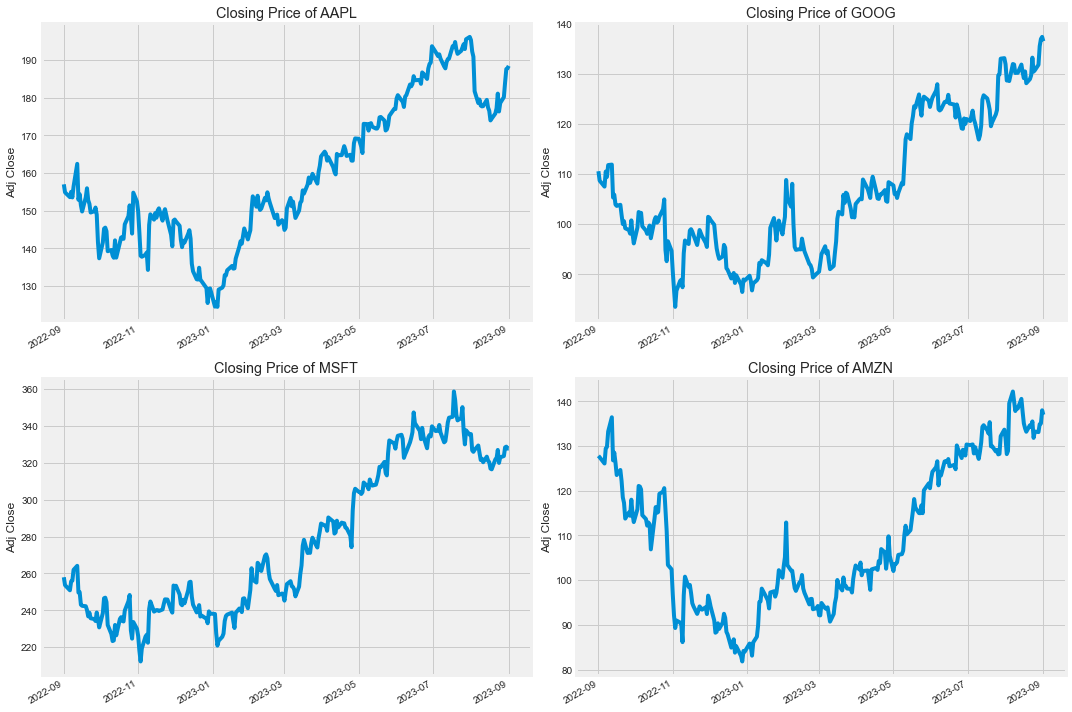

In [10]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

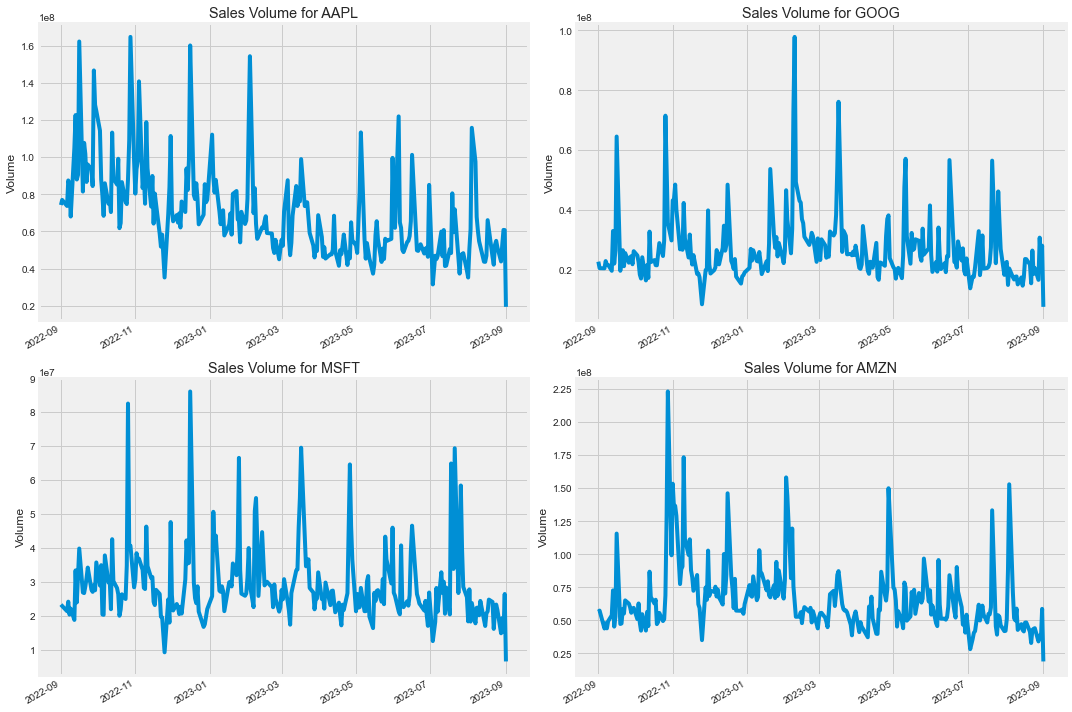

In [11]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

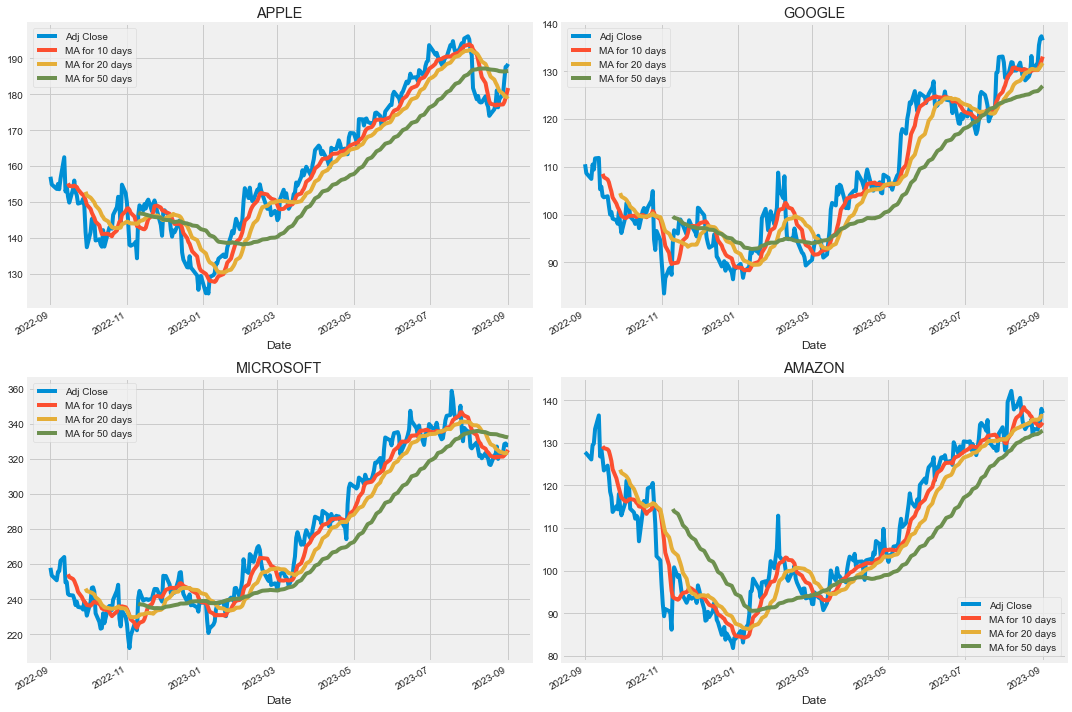

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

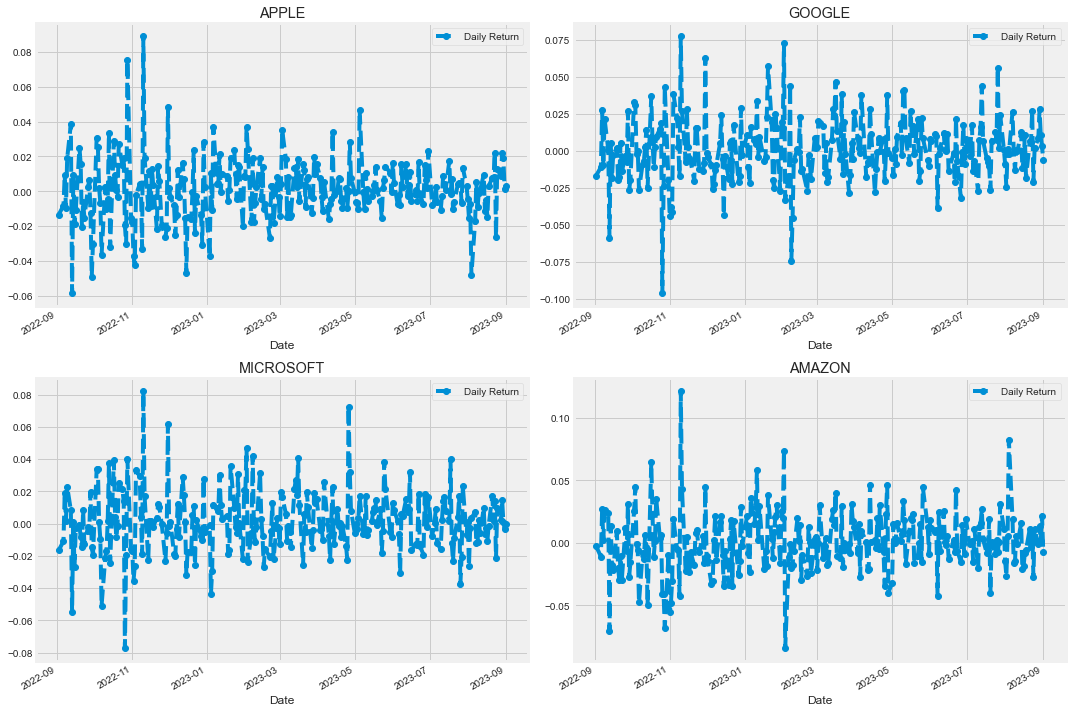

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

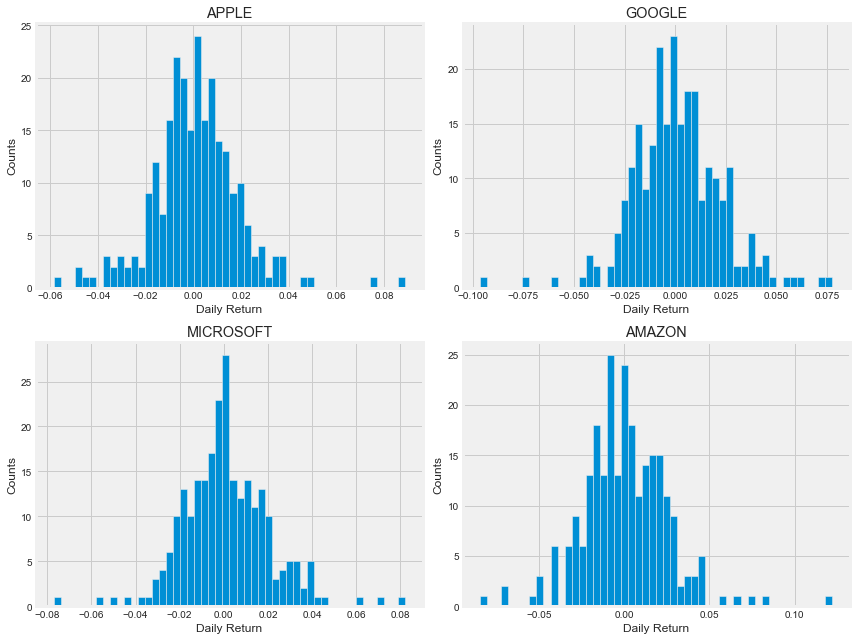

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-01,NaN,NaN,NaN,NaN
2022-09-02,-0.013611,-0.002425,-0.016915,-0.016667
2022-09-06,-0.008215,-0.010980,-0.011042,-0.010974
2022-09-07,0.009254,0.026723,0.027912,0.019111
2022-09-08,-0.009618,0.002626,-0.009595,0.001666


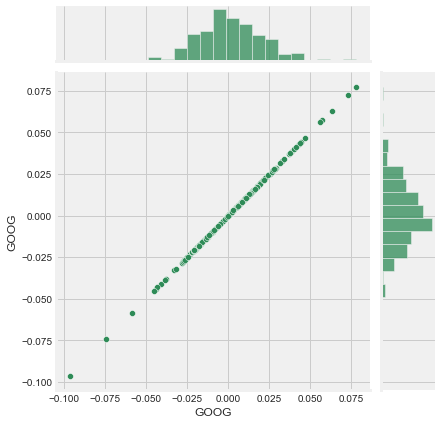

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

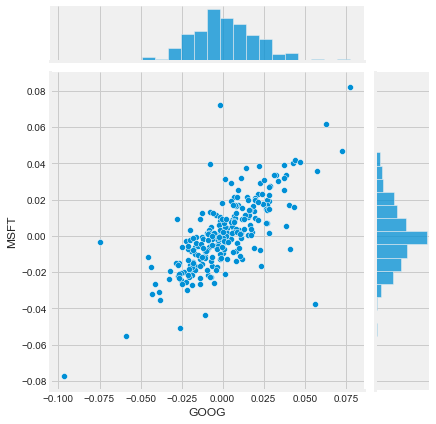

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

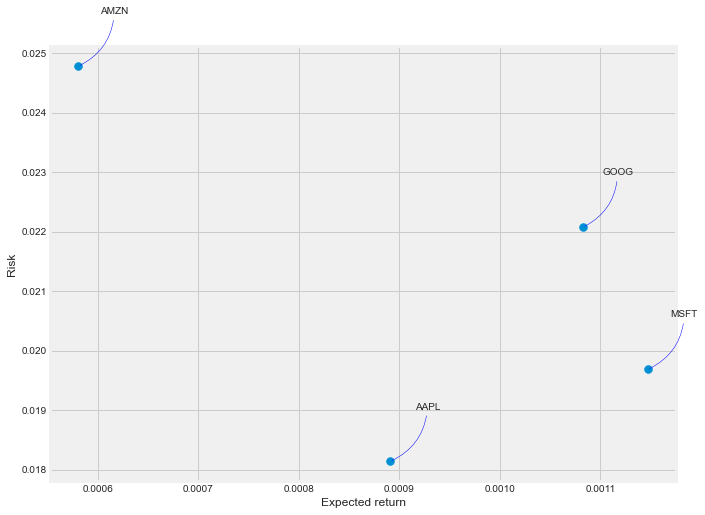

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Prediction Using LTSM

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466089,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804700,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


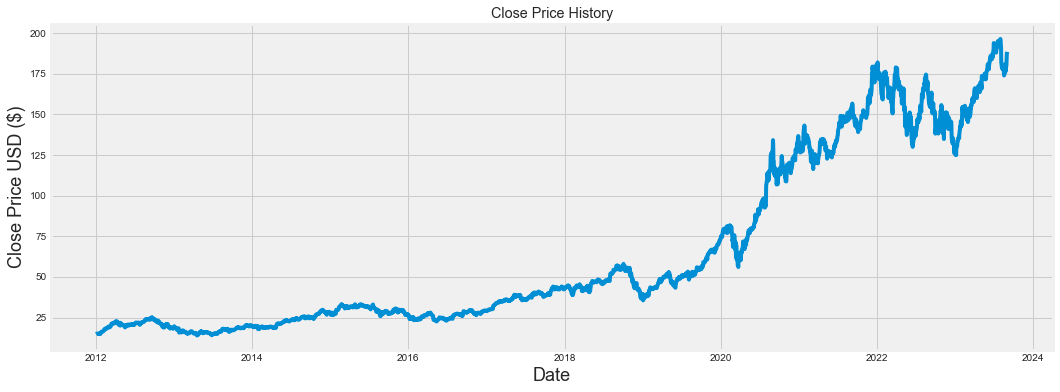

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2790

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.95178146],
       [0.95298693],
       [0.95652116]])

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


In [24]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [25]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2730/2730 [==============================] - 45s 15ms/step - loss: 0.0012


In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 16ms/step


8.800873529818626

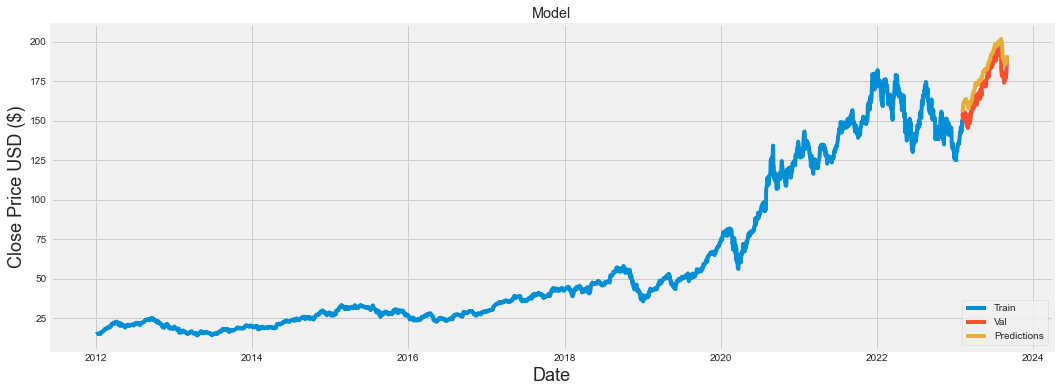

In [28]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
valid

,Close,Predictions
Date,,
2023-02-03,154.500000,155.550354
2023-02-06,151.729996,157.508896
2023-02-07,154.649994,159.050842
2023-02-08,151.919998,160.634872
2023-02-09,150.869995,161.553680
...,...,...
2023-08-28,180.190002,186.618057
2023-08-29,184.119995,187.125595
2023-08-30,187.649994,188.208435
